# Use Result Helpers to compare mode shapes for solids and then shells {#ref_compare_modes}

The `Result <ansys.dpf.core.results.Result>`{.interpreted-text
role="class"} class which instances are created by the
`Model <ansys.dpf.core.model.Model>`{.interpreted-text role="class"}
gives access to helpers to request results on specific mesh and time
scopings. With those helpers, working on a custom spatial and temporal
subset of the model is straightforward.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

First, create a model object to establish a connection with an example
result file


In [2]:
model = dpf.Model(examples.download_all_kinds_of_complexity_modal())
print(model)

DPF Model
------------------------------
Modal analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  element_nodal_forces: ElementalNodal Element nodal Forces
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  2388 nodes 
  1824 elements 
  Unit: m 
  With solid (3D) elements, shell (2D) elements, shell (3D) elements, beam (1D) el

# Visualize specific mode shapes

Choose the modes to visualize


In [3]:
modes = [1, 5, 10, 15]

Choose to split the displacement on solid/shell/beam to only focus on
shell elements


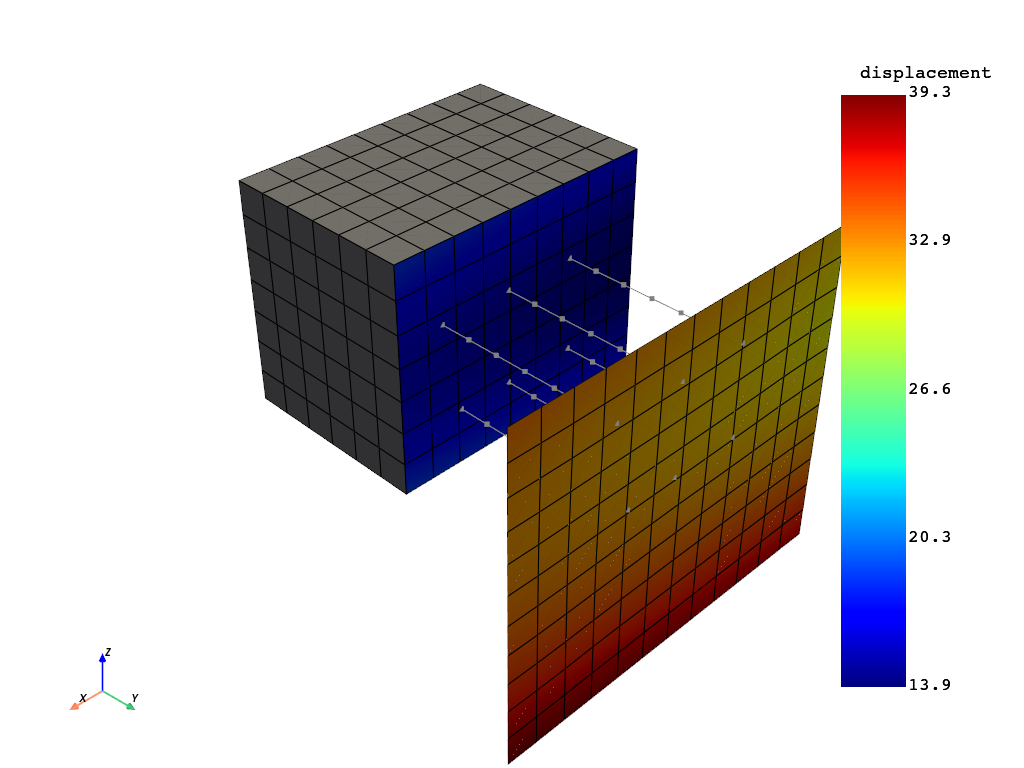

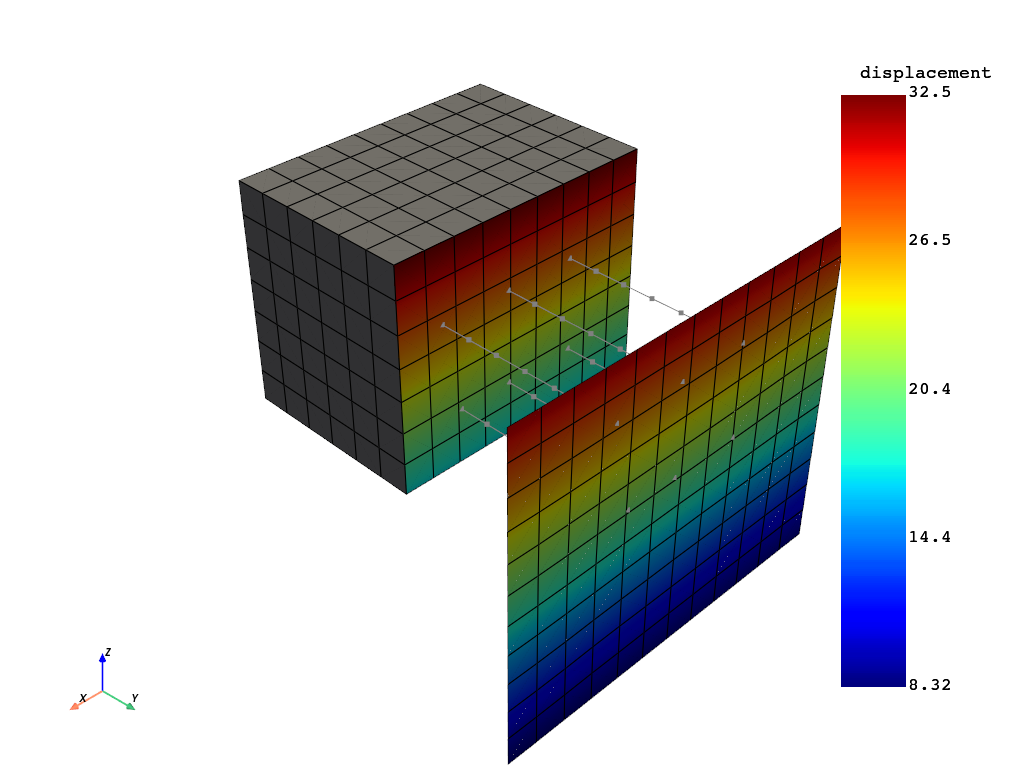

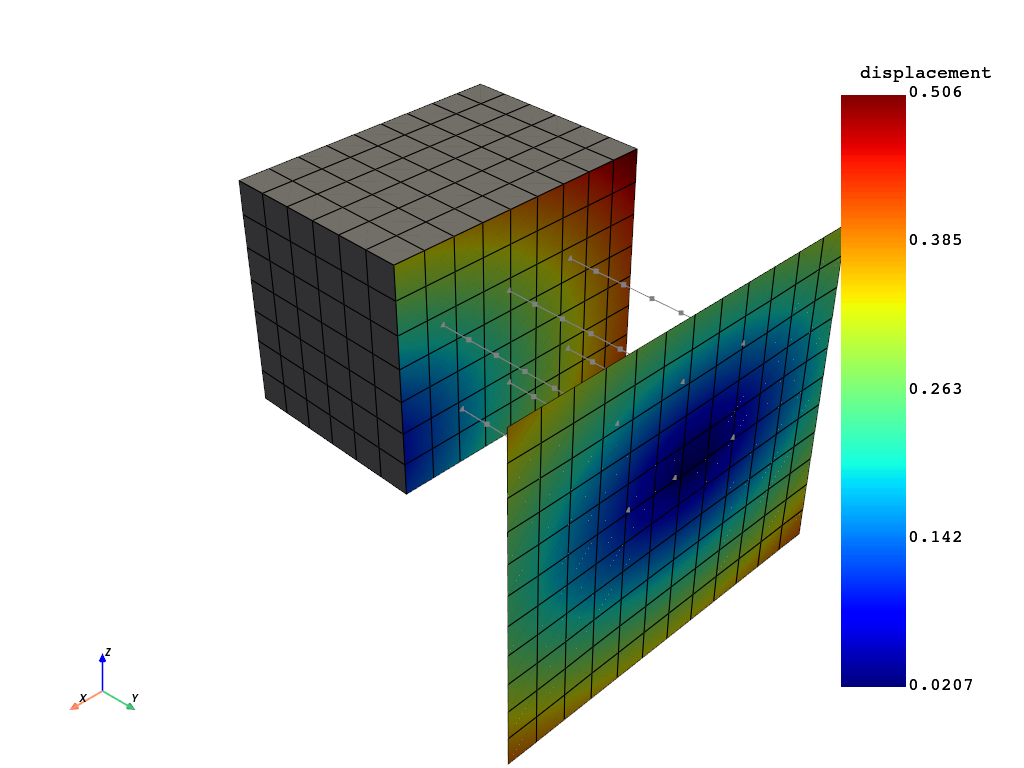

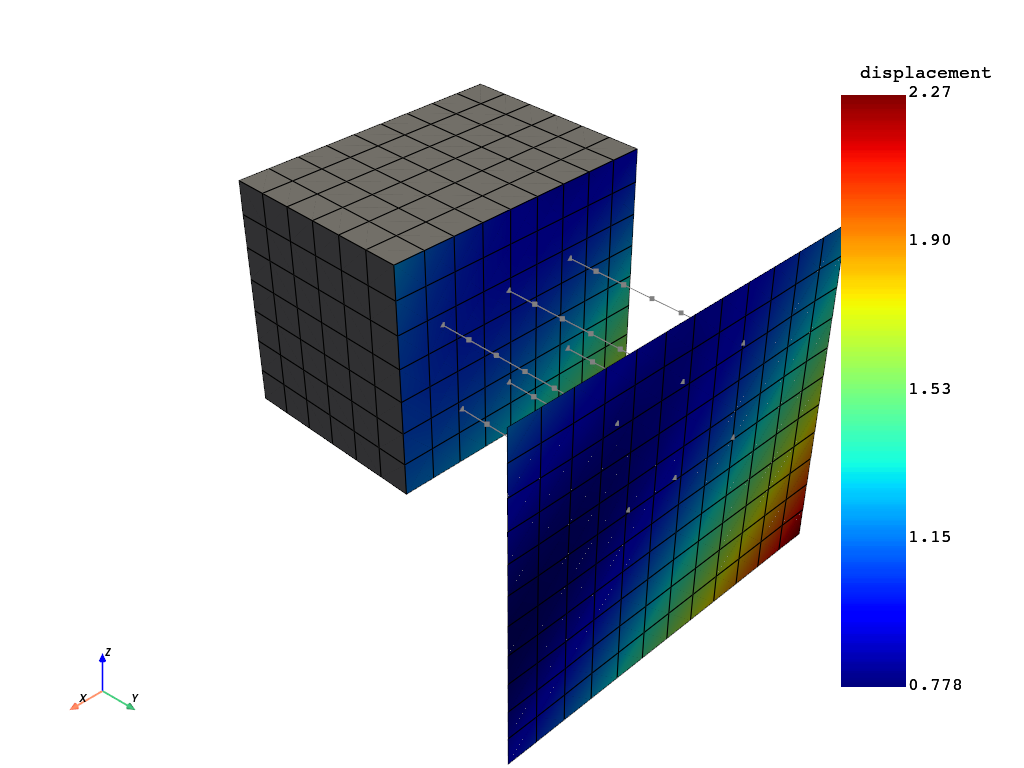

In [4]:
disp = model.results.displacement
for mode in modes:
    fc = disp.on_time_scoping(mode).split_by_shape.eval()
    model.metadata.meshed_region.plot(fc.shell_field())

Choose to split the displacement on solid/shell/beam to only focus on
solid elements


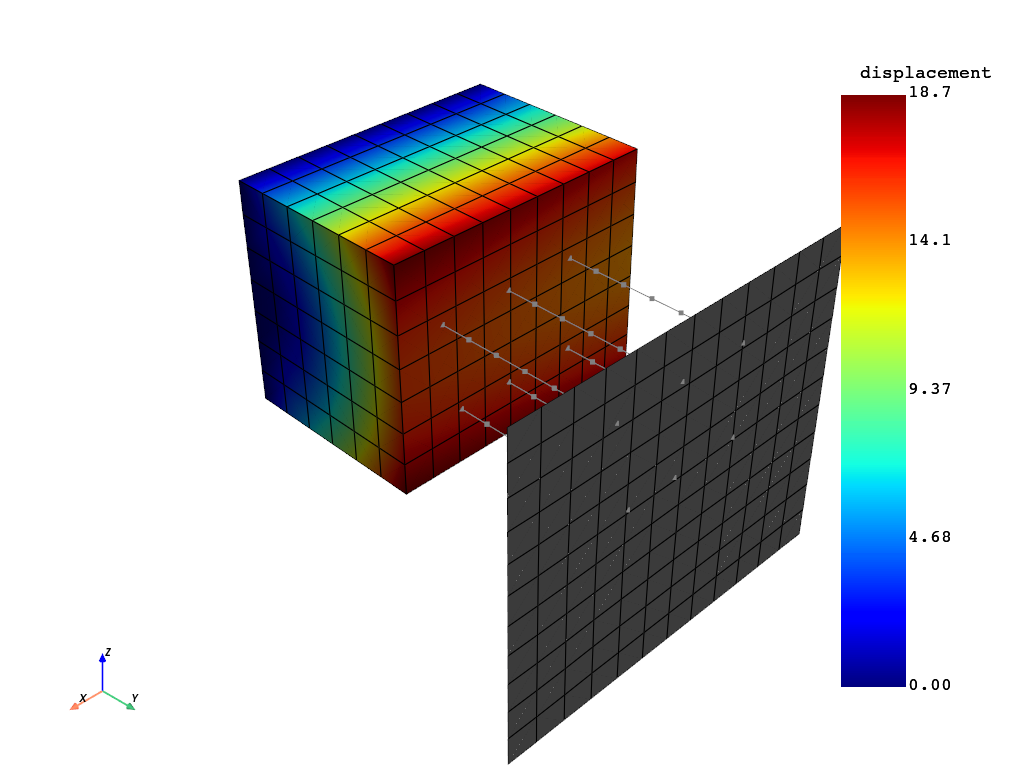

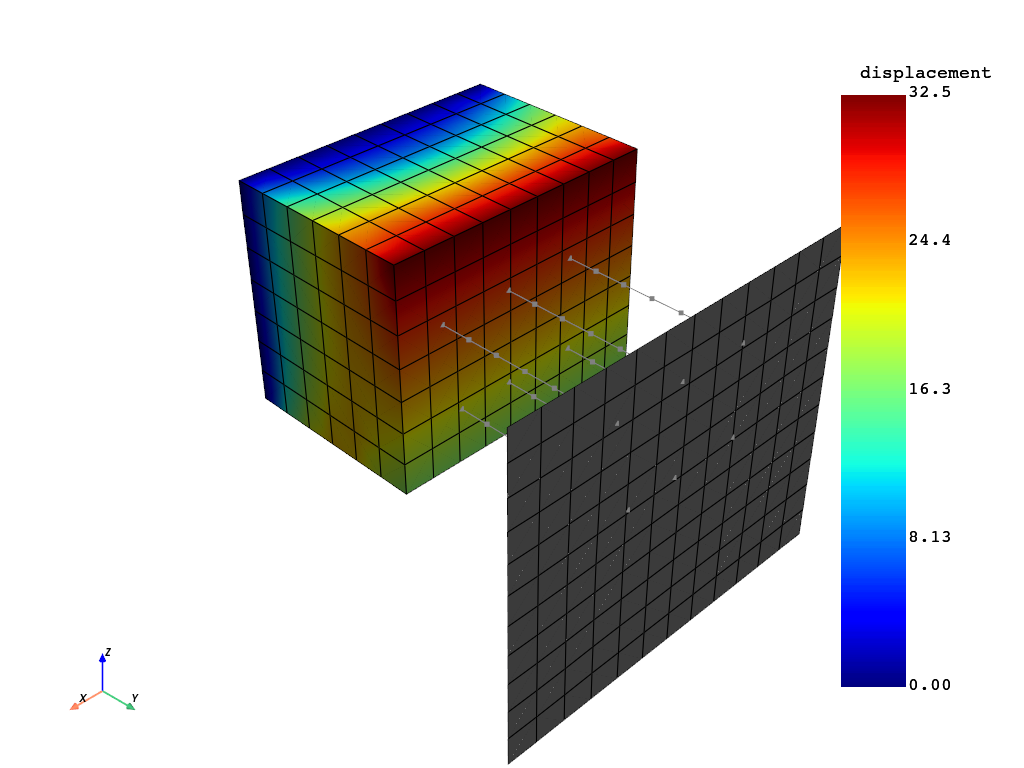

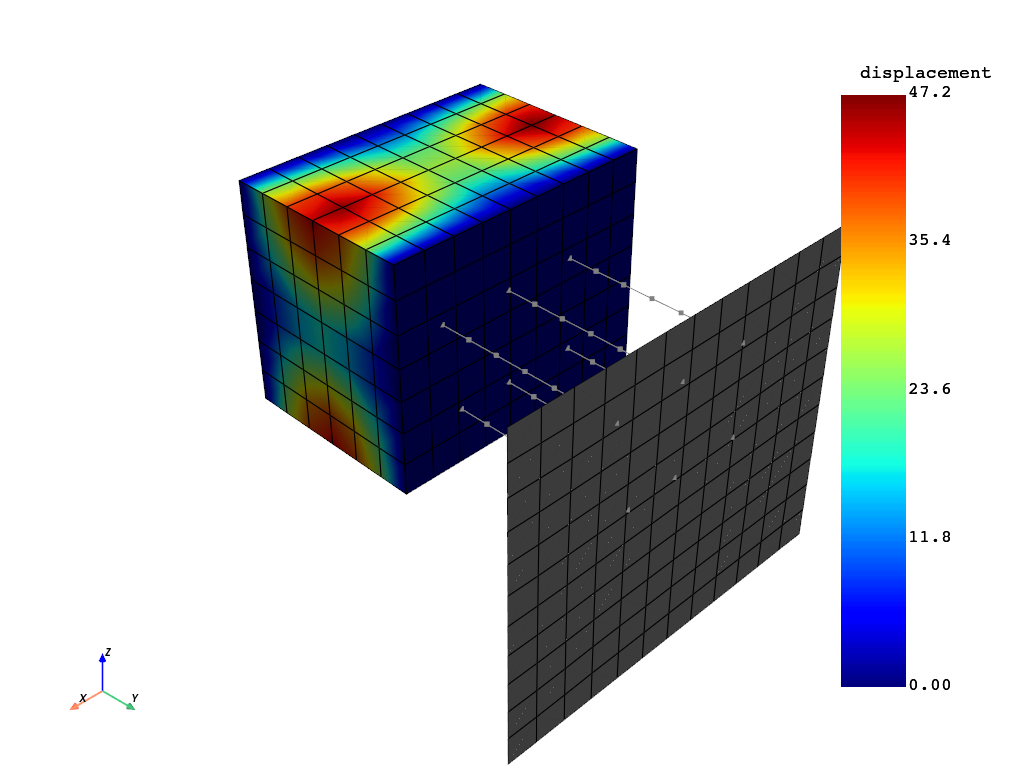

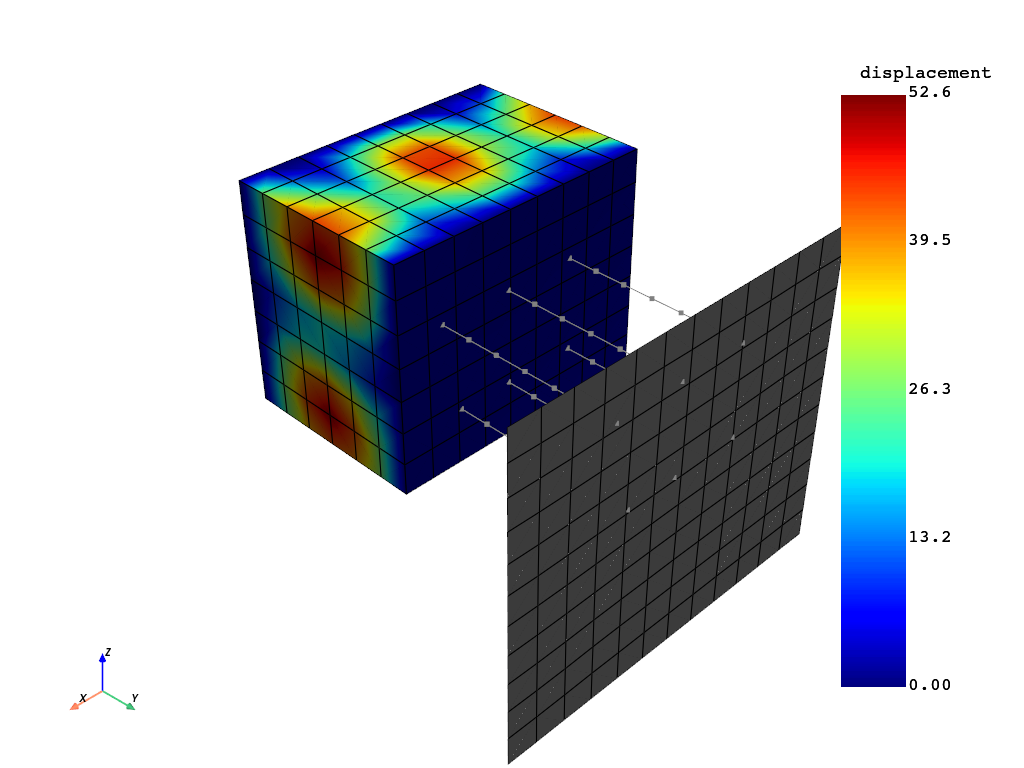

In [5]:
disp = model.results.displacement
for mode in modes:
    fc = disp.on_time_scoping(mode).split_by_shape.eval()
    model.metadata.meshed_region.plot(fc.solid_field())